スパースモデリング第12章　辞書の探求
==

In [1]:
from matplotlib.font_manager import FontProperties

font_path = u'/Library/Fonts/ヒラギノ角ゴ Pro W3.otf'
font_prop = FontProperties(fname=font_path)
plt.rc('font',family=font_prop.get_name())

ランダムな辞書を生成
--

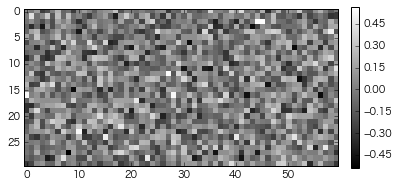

In [95]:
A0 = np.random.randn(30, 60)
A0 = np.dot(A0, np.diag(1. / np.sqrt(np.diag(np.dot(A0.T, A0)))))

plt.imshow(A0, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.024, pad=0.04)

信号事例を生成
--

(0, 29)

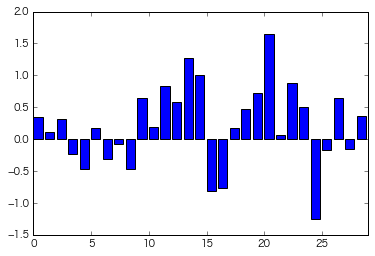

In [118]:
Y = np.zeros((30, 4000))
sig = 0.1
for i in range(4000):
    Y[:, i] = np.dot(A0[:, np.random.randint(60, size=4)], np.random.randn(4)) + np.random.randn(30) * sig
    
plt.bar(range(30), Y[:, 0])
plt.xlim(0, 29)

追跡法
--

In [104]:
def OMP(A, b, k0, eps):
    """ 
    直交マッチング追跡(orthogonal matching pursuit; OMP) 
    
    A nxm行列
    b n要素の観測
    eps 誤差の閾値

    """
    # 初期化
    x = np.zeros(A.shape[1])
    S = np.zeros(A.shape[1], dtype=np.uint8)
    r = b.copy()
    rr = np.dot(r, r)
    for _ in range(k0):
        # 誤差計算
        err = rr - np.dot(A[:, S == 0].T, r) ** 2
            
        # サポート更新
        ndx = np.where(S == 0)[0]
        S[ndx[err.argmin()]] = 1
    
        # 解更新
        As = A[:, S == 1]
        pinv = np.linalg.pinv(np.dot(As, As.T))
        x[S == 1] = np.dot(As.T, np.dot(pinv, b))
        
        # 残差更新
        r = b - np.dot(A, x)
        rr = np.dot(r, r)
        if rr < eps:
            break
            
    return x, S

MOD辞書学習アルゴリズム
--

0 67.1260632193
1 61.0316721139
2 57.1400500746
3 53.6917448288
4 50.4547921002
5 47.6125104023
6 45.4251731847
7 43.8358752892
8 42.6448727446
9 41.6119221934
10 40.5794118233
11 39.6491737189
12 38.667100731
13 38.0631166332
14 37.5658777667
15 37.1331710496
16 36.6246303773
17 35.8915285394
18 35.0865776682
19 34.3892985614
20 33.8197487648
21 33.4570603673
22 33.2258246495
23 33.0346488519
24 32.9425956729
25 32.9077381568
26 32.8597698467
27 32.8165070258
28 32.708377918
29 32.5908004323
30 32.5478666538
31 32.4890396953
32 32.4804516895
33 32.4655678706
34 32.4595797412


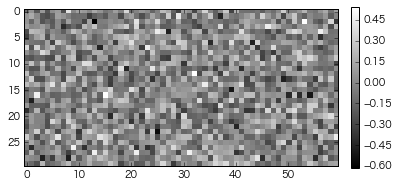

In [122]:
# 初期辞書
A = Y[:, np.random.randint(4000, size=60)]
A = np.dot(A, np.diag(1. / np.sqrt(np.diag(np.dot(A.T, A)))))

X = np.zeros((A.shape[1], Y.shape[1]))
eps = A.shape[0] * (sig ** 2)
k0 = 4
n_iter = 50

for k in range(n_iter):
    for i in range(Y.shape[1]):
        X[:, i], _ = OMP(A, Y[:, i], k0, eps=eps)

    A = np.dot(Y, np.dot(X.T, np.linalg.pinv(np.dot(X, X.T))))
#     A = np.dot(A, np.diag(1. / np.sqrt(np.diag(np.dot(A.T, A)))))

    opt = np.linalg.norm(Y - np.dot(A, X))
    if k > 0 and opt_old - opt < 1e-6:
        break
    opt_old = opt.copy()
    print(k, opt)
        
plt.imshow(A, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.024, pad=0.04)

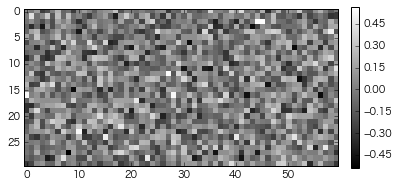

In [117]:
plt.imshow(A0, cmap='gray', interpolation='Nearest')
plt.colorbar(fraction=0.024, pad=0.04)

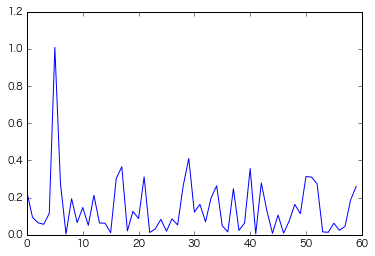

In [123]:
plt.plot(np.abs(np.diag(np.dot(A0.T, A))))
